# 使用 cifar-10 数据集完成分类任务，可以 10 分类也可以 2 分类，自己把握


### 加载库函数

In [1]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### 下载数据集

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('X train shape: ' , X_train.shape)
print('y train shape: ' , y_train.shape)
print('X test shape: ' , X_test.shape)
print('y test shape: ' , y_test.shape)

X train shape:  (50000, 32, 32, 3)
y train shape:  (50000, 1)
X test shape:  (10000, 32, 32, 3)
y test shape:  (10000, 1)


### 标准化

In [4]:
X_train = X_train/255
X_test = X_test/255

### 转换为1维数据

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

### 设定标签

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

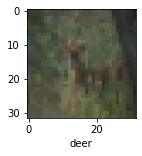

In [7]:
def show_img(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

show_img(X_train, y_train, 10)

### 建立模型

In [8]:
# 保存历史
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
 
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [9]:
history = LossHistory()

In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
#第一个卷积层
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[32,32,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#第二个
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#平滑
cnn.add(tf.keras.layers.Flatten())

#全连接
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

#输出
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
# 模型编译
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# 模型结构
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                73792     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

训练

In [14]:
# 训练
history2=cnn.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=128,verbose=1,epochs=50,callbacks=[history])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.6668 - acc: 0.4004 - val_loss: 1.4254 - val_acc: 0.4981
Epoch 2/50
50000/50000 [==============================] - 49s 988us/sample - loss: 1.3293 - acc: 0.5314 - val_loss: 1.2407 - val_acc: 0.5598
Epoch 3/50
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.2078 - acc: 0.5767 - val_loss: 1.1627 - val_acc: 0.5911
Epoch 4/50
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1326 - acc: 0.6037 - val_loss: 1.1244 - val_acc: 0.6081
Epoch 5/50
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.0797 - acc: 0.6244 - val_loss: 1.0719 - val_acc: 0.6233
Epoch 6/50
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.0461 - acc: 0.6377 - val_loss: 1.0609 - val_acc: 0.6304
Epoch 7/50
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.0075 - acc: 0.6524 - val_loss: 

In [15]:
print(history2)

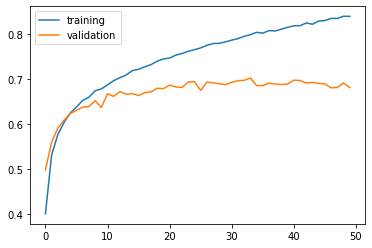

In [16]:
import matplotlib.pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [17]:
#评估模型
score = cnn.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 4s 419us/sample - loss: 1.1321 - acc: 0.6807
[1.1321317819595338, 0.6807]


In [18]:
from sklearn.metrics import confusion_matrix
# 加载相关库函数
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y, y_pred, cmap=plt.cm.Blues, title='混淆矩阵'):
    """
    绘制混淆矩阵
    :param y: 真实值
    :param y_pred: 预测值
    :param cmap: 热力图的颜色
    :param title: 图像标题
    :return:
    """
    cm = confusion_matrix(y, y_pred)
    classes = list(set(y))
    classes.sort()
    plt.imshow(cm, cmap)
    indices = range(len(cm))
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    # 热度表
    plt.colorbar()
    # 坐标轴含义
    plt.xlabel('guess')
    plt.ylabel('fact')
    plt.title(title)
    # 显示数据的值（Numbers）
    for first_index in range(len(cm)):
        for second_index in range(len(cm[first_index])):
            plt.text(first_index, second_index, cm[first_index][second_index])

In [19]:
y_pred=cnn.predict_classes(X_test)

In [20]:
y_pred

array([3, 8, 8, ..., 7, 0, 7], dtype=int64)

In [21]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

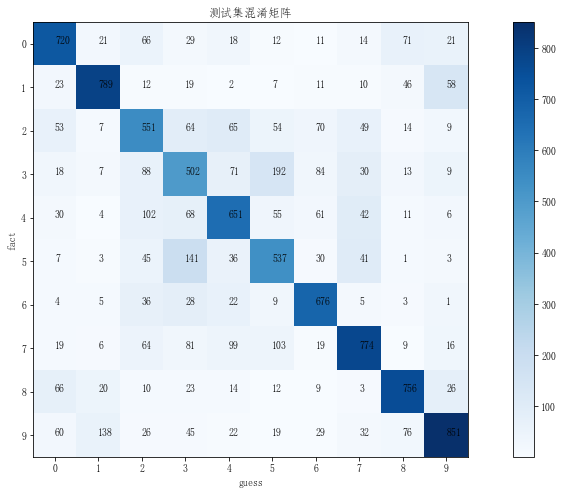

In [22]:
# 输出混淆矩阵
plt.figure(figsize=(16,8), facecolor='w')

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plot_confusion_matrix(y_test,y_pred,
                      title='测试集混淆矩阵')
plt.show()

### 测试一下

In [23]:
y_pred = cnn.predict(X_test)

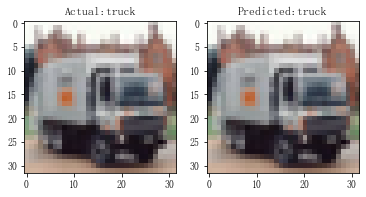

In [24]:
def predict_img(X, y, idx):
    plt.figsize=(2,2)
    ax1 = plt.subplot(1,2,1)
    ax1.imshow(X[idx])
    plt.title("Actual:" + str(classes[y[idx]]))
    ax2 = plt.subplot(1,2,2)
    ax2.imshow(X[idx])
    plt.title("Predicted:" + str(classes[np.argmax(y_pred[idx])]))
    plt.show()

predict_img(X_test, y_test, 11)